## Titanic Survival

## Project Description:

In this particular project, we are using a dataset that contains information like, Passengerid, Survived,pclass, sex, Age, sibsp, parch, ticket, fare, cabin, embarked. and using that data we are going to predict the survived passengers.
However, before you go ahead and make a prediction, it is advised that you first pre-process the data, since it may contain some irregularities and noise. In addition, try various tricks and techniques in order to gain the best accuracy in your predictions.


In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv(r"C:\Users\ritus\Downloads\ML Project - Logistic Regression Titanic Survival U16955478860.txt")

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
data.shape

(891, 12)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
data.drop(["Cabin",'Ticket'],axis = 1, inplace = True)

In [62]:
data.shape

(891, 10)

In [63]:
data["Age"] = data['Age'].fillna(data.Age.mean())

In [67]:
data['Embarked'] = data['Embarked'].fillna(data.Embarked.mode()[0])

In [68]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [69]:
data.shape

(891, 10)

In [70]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [73]:
# encoding needed for thesex and Embarked 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [74]:
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

In [76]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [148]:
x = data.drop(['Survived','Name'], axis = 1)
y = data.Survived

In [149]:
x.shape

(891, 8)

In [150]:
y.shape

(891,)

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [152]:
x_train.shape

(712, 8)

In [153]:
x_test.shape

(179, 8)

In [154]:
from sklearn.linear_model import LogisticRegression 
reg = LogisticRegression()

In [155]:
reg.fit(x_train,y_train)

C:\Users\ritus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [156]:
yp = reg.predict(x_test)
yp

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [157]:
reg.score(x_train,y_train)*100

79.07303370786516

In [158]:
reg.score(x_test,y_test)*100

77.6536312849162

In [159]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [160]:
accuracy_score(yp,y_test)*100

77.6536312849162

In [161]:
precision_score(yp,y_test)*100

70.27027027027027

In [162]:
recall_score(yp,y_test)*100

74.28571428571429

In [163]:
confusion_matrix(yp,y_test)

array([[87, 22],
       [18, 52]])

In [164]:
f1_score(yp,y_test)*100

72.22222222222221

In [167]:
y_prob = reg.predict_proba(x_test)[:,1]
y_prob

array([0.18360083, 0.1867851 , 0.18733547, 0.79972994, 0.55300483,
       0.82861158, 0.59444205, 0.11275794, 0.58518007, 0.7566286 ,
       0.23202906, 0.15372579, 0.58394095, 0.12710811, 0.17207296,
       0.87473356, 0.32422015, 0.67631236, 0.27052905, 0.23355117,
       0.11598979, 0.27848429, 0.53598917, 0.16547044, 0.14566149,
       0.171802  , 0.23061862, 0.22770217, 0.09050425, 0.59462889,
       0.19363793, 0.54046752, 0.40585945, 0.55600387, 0.10942185,
       0.17135679, 0.21419125, 0.56956061, 0.88166714, 0.1669897 ,
       0.17705495, 0.12413371, 0.1812504 , 0.18757696, 0.62622082,
       0.10630332, 0.09644581, 0.12315599, 0.10713995, 0.46753974,
       0.65147868, 0.88203152, 0.1205524 , 0.49384483, 0.10750791,
       0.8709142 , 0.13645329, 0.9361852 , 0.6653496 , 0.54203672,
       0.12948352, 0.73128124, 0.70658562, 0.22817947, 0.11288715,
       0.75028225, 0.19445233, 0.12759212, 0.15872271, 0.86670529,
       0.68415367, 0.93994007, 0.4318206 , 0.90006878, 0.18441

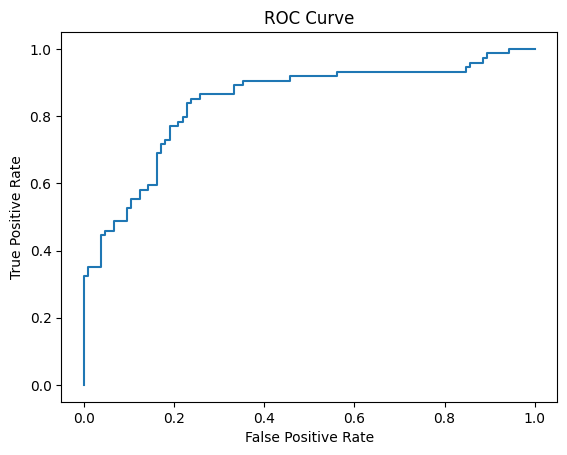

AUC Score: 0.8424710424710425


In [168]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", auc)
